<a href="https://colab.research.google.com/github/sksoumik/machine-learning-projects/blob/master/amazon_review_classification_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_path = '/content/drive/My Drive/ml/amazon_reviews_eda/Reviews_of_Amazon_Products.csv'

In [0]:
import pandas as pd

In [0]:
dataframe = pd.read_csv(file_path)
dataframe.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [0]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [0]:
dataframe = dataframe[['name', 'reviews.text', 'reviews.doRecommend', 'reviews.numHelpful']]

In [0]:
dataframe.shape

(28332, 4)

In [0]:
dataframe.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,AmazonBasics AAA Performance Alkaline Batterie...,I order 3 of them and one of the item is bad q...,NaN,NaN
1,AmazonBasics AAA Performance Alkaline Batterie...,Bulk is always the less expensive way to go fo...,NaN,NaN
2,AmazonBasics AAA Performance Alkaline Batterie...,Well they are not Duracell but for the price i...,NaN,NaN
3,AmazonBasics AAA Performance Alkaline Batterie...,Seem to work as well as name brand batteries a...,NaN,NaN
4,AmazonBasics AAA Performance Alkaline Batterie...,These batteries are very long lasting the pric...,NaN,NaN


In [0]:
# see how many null values present in our dataset
dataframe.isnull().sum()

name                       0
reviews.text               0
reviews.doRecommend    12246
reviews.numHelpful     12217
dtype: int64

In [0]:
dataframe.dropna(inplace=True)

In [0]:
dataframe.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [0]:
dataframe.shape

(16086, 4)

In [0]:
dataframe['name'].unique()

array(['Echo Spot Pair Kit (Black)',
       'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
       'Amazon Tap Smart Assistant Alexaenabled (black) Brand New',
       'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
       'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
       'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 

In [0]:
# ignore products that has less than 500 individual reviews

dataframe = dataframe.groupby('name').filter(lambda x: len(x) > 500).reset_index(drop=True)
dataframe['name'].unique()

array(['Amazon Tap Smart Assistant Alexaenabled (black) Brand New',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers',
       'Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers',
       'Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers'],
     

In [0]:
len(dataframe['name'].unique()) # So we have 11 products that has more than 500 reviews for each product

11

In [0]:
dataframe['reviews.doRecommend'].head()

0     True
1     True
2     True
3     True
4    False
Name: reviews.doRecommend, dtype: object

In [0]:
dataframe['reviews.numHelpful'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: reviews.numHelpful, dtype: float64

In [0]:
# convert the bolean and floating values into integers

dataframe['reviews.doRecommend'] = dataframe['reviews.doRecommend'].astype(int)
dataframe['reviews.numHelpful'] = dataframe['reviews.numHelpful'].astype(int)

### Clean data

In [0]:
# clean the first column
dataframe['name'] = dataframe['name'].apply(lambda x: x.split(',,,')[0])
dataframe['name'].unique()

array(['Amazon Tap Smart Assistant Alexaenabled (black) Brand New',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers',
       'Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers',
       'Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers'],
     

In [0]:
# clean the second column

dataframe['reviews.text'].head()

0    With the new update allowing hands-free "Hey A...
1    Bought it for a couple of my friends and it wa...
2    It works well it takes time for it to know you...
3    Works as well as the Echo and now has a skill ...
4    This is fun but would not buy again. Not very ...
Name: reviews.text, dtype: object

In [0]:
for index, text in enumerate(dataframe['reviews.text'][20:25]):
  print(f"Review {index + 1} :  {text}")

Review 1 :  This little speaker is way better that her mother. after that update making it hand free, i recommend to anyone.
Review 2 :  I'm glad that I bought this product, it's easy to understand, my grandkids loves it.
Review 3 :  This is everything the echo is but portable. You're not getting the same sound quality but more than enough for the backyard or beach. A recent update was made to give you the option of using the button or voice activated controls.
Review 4 :  Alexa works great, but the the sound quality of this speaker is terrible, your much better off with a echo dot and bose sound link mini set up.
Review 5 :  My family and I are enjoying Alexa. Great for playing music, setting timers, adding to shopping list, etc. Still finding new and useful things to do with it.


## Contractions

In [0]:
# expand contractions

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [0]:
# regular expression for finding contractions

import re 
contraction_regex = re.compile('(%s)' % '|'.join(contractions_dict.keys())) 

In [0]:
# Function for expanding contractions

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contraction_regex.sub(replace, text)

In [0]:
# Expanding Contractions in the reviews

dataframe['reviews.text']=dataframe['reviews.text'].apply(lambda x:expand_contractions(x))

In [0]:
for index, text in enumerate(dataframe['reviews.text'][20:25]):
  print(f"Review {index + 1} :  {text}")

Review 1 :  This little speaker is way better that her mother. after that update making it hand free, i recommend to anyone.
Review 2 :  I am glad that I bought this product, it is easy to understand, my grandkids loves it.
Review 3 :  This is everything the echo is but portable. You're not getting the same sound quality but more than enough for the backyard or beach. A recent update was made to give you the option of using the button or voice activated controls.
Review 4 :  Alexa works great, but the the sound quality of this speaker is terrible, your much better off with a echo dot and bose sound link mini set up.
Review 5 :  My family and I are enjoying Alexa. Great for playing music, setting timers, adding to shopping list, etc. Still finding new and useful things to do with it.


## Lowercase the words

In [0]:
dataframe['cleaned'] = dataframe['reviews.text'].apply(lambda x: x.lower())
dataframe['cleaned'].head()

0    with the new update allowing hands-free "hey a...
1    bought it for a couple of my friends and it wa...
2    it works well it takes time for it to know you...
3    works as well as the echo and now has a skill ...
4    this is fun but would not buy again. not very ...
Name: cleaned, dtype: object

## Remove digits and words

In [0]:
dataframe['cleaned']=dataframe['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [0]:
import string

##  remove punctuations

In [0]:
dataframe['cleaned']=dataframe['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [0]:
# Removing extra spaces
dataframe['cleaned']=dataframe['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [0]:
for index,text in enumerate(dataframe['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 this is my second echo purchase my first was the original echo for my home and the automation feature aside the sound is excellent alexa is response is better than any digital assistant to date and the ready access to prime is convenient this is all of that and portable and rechargeable as well additionally the inclusion of bluetooth and a headphone jack is amazing
Review 2:
 always loved the amazon echo now we can rake it with us outside wherever
Review 3:
 i really like the sound of the tab the only complaint is that you have to push the button every time you have to speak or listen to tab unlike the echo where you just speak and it answers without pushing any buttons the echo has a cheaper sounding speaker i would wait till there is a sale in it before paying full price otherwise it is just like a bluetooth speaker
Review 4:
 amazon tap is exactly what i expected it would be the sound quality is good with the alexa features i love that you can charge it on the base or wit

## Preparing Text Data for Exploratory Data Analysis

In [0]:
# create Document Term Matrix 
# it provides the frequency of a word in a corpus


## Remove stopwords and lammatized

In [0]:
import spacy

In [0]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [0]:
# Lemmatization with stopwords removal
dataframe['lemmatized'] = dataframe['cleaned'].apply(lambda x: ' '.join(
    [token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))

In [0]:
# group them according to the products

df_grouped = dataframe[['name', 'lemmatized'
                        ]].groupby(by='name').agg(lambda x: ' '.join(x))
df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",tablet offer fun expect good product great pri...
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",app miss google play store list minimal tablet...
Amazon Tap Smart Assistant Alexaenabled (black) Brand New,new update allow handsfree hey alexa command g...
"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",app miss google play store list minimal tablet...
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",great tablet kid travel grandchild love buy yr...


In [0]:
# create document term matrix

from sklearn.feature_extraction.text import CountVectorizer

In [0]:
count_vectorizer = CountVectorizer(analyzer='word')
data = count_vectorizer.fit_transform(df_grouped['lemmatized'])
document_term_matrix = pd.DataFrame(
    data.toarray(), columns=count_vectorizer.get_feature_names())

In [0]:
document_term_matrix.index = df_grouped.index
document_term_matrix.head(3)

,aa,abc,abcmousecom,abcs,ability,abit,abke,able,abount,absolute,absolutelt,absolutely,absorb,abuse,ac,acc,acce,accedently,accent,accept,acceptable,access,accessable,accessibility,accessible,accessory,accident,accidental,accidentally,accidentallyor,accidently,accommodate,accomodate,accomplish,accomplishedthe,accordingly,account,accountit,accountpermission,accountsextra,...,yesterday,yo,yoga,yokod,york,yoru,you,youand,youe,youkathleen,young,youngest,youngster,youreyesprobably,youse,youself,youth,youtube,youtubeoverall,yr,yrs,zero,zillionth,zinio,zippy,zone,äãis,äì,äô,äôd,äôm,äôre,äôs,äôsadvertisement,äôt,äôve,äù,äùtablet,äúyoutube,ôºå
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",0,0,0,0,7,0,0,24,0,0,1,11,0,2,0,0,0,0,0,0,2,13,1,0,0,1,0,0,1,0,0,0,0,0,1,0,11,0,0,0,...,0,1,0,0,0,1,2,0,0,0,5,0,0,0,1,1,0,13,1,1,0,0,1,0,0,1,0,0,2,2,5,2,29,1,26,3,1,1,1,0
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",0,0,0,0,18,1,0,63,1,3,0,28,0,2,0,1,1,0,0,2,0,57,0,1,1,0,0,2,0,0,2,1,1,2,0,1,29,0,1,0,...,1,1,1,0,0,0,0,1,0,0,17,0,0,1,0,0,1,31,0,20,2,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Amazon Tap Smart Assistant Alexaenabled (black) Brand New,0,0,0,0,10,0,0,30,0,0,0,6,0,0,1,0,0,0,2,0,3,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9,0,0,0,...,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


## Visualize the text frequency

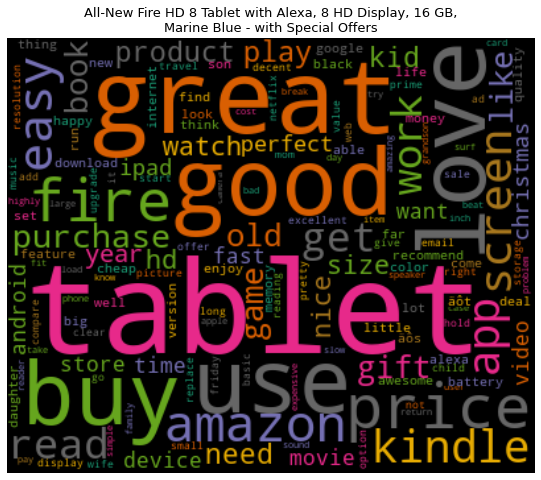

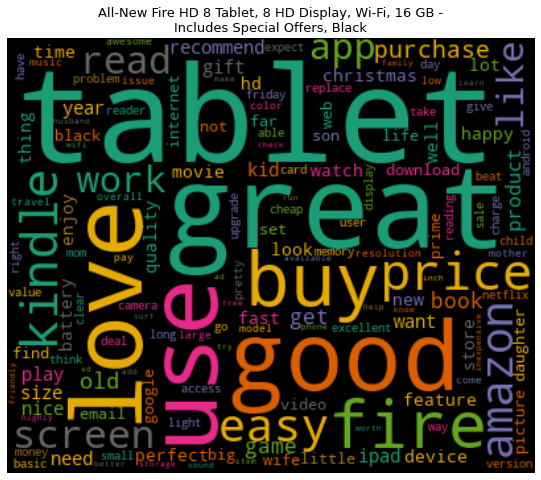

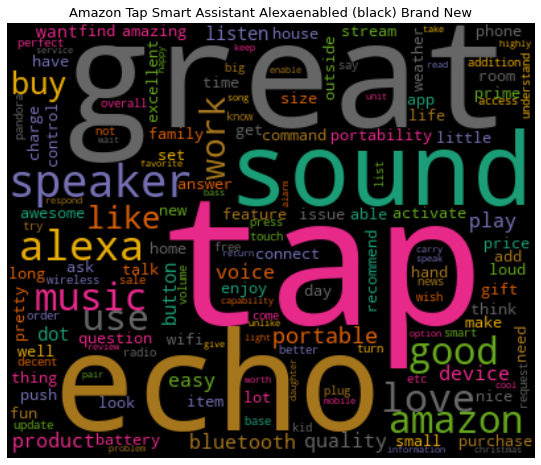

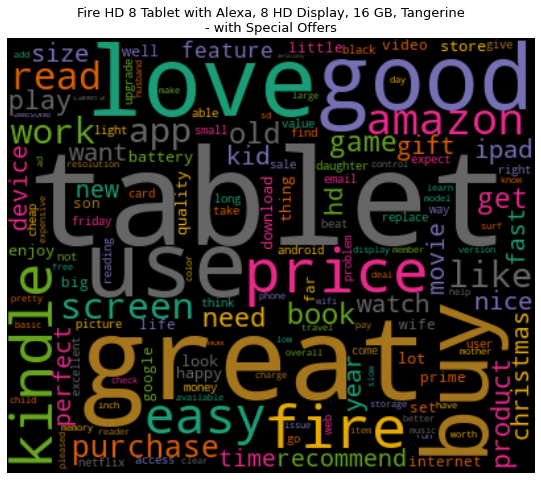

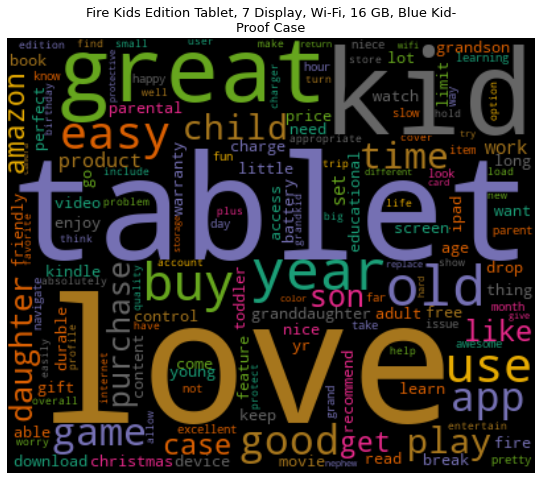

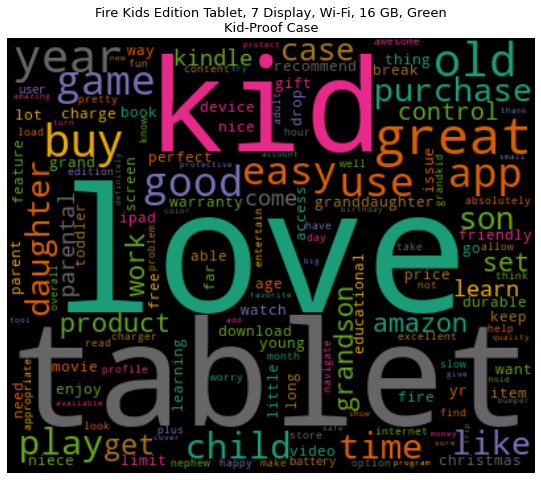

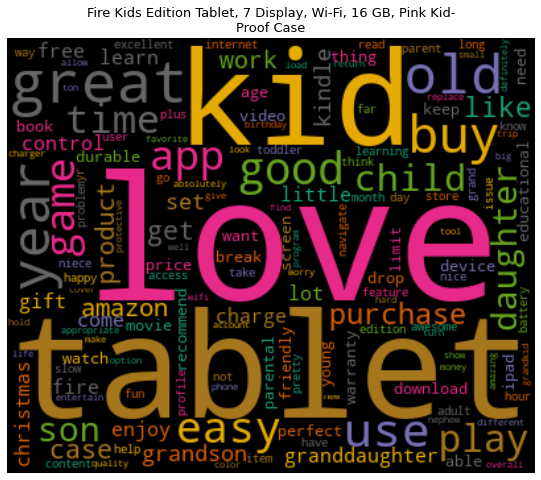

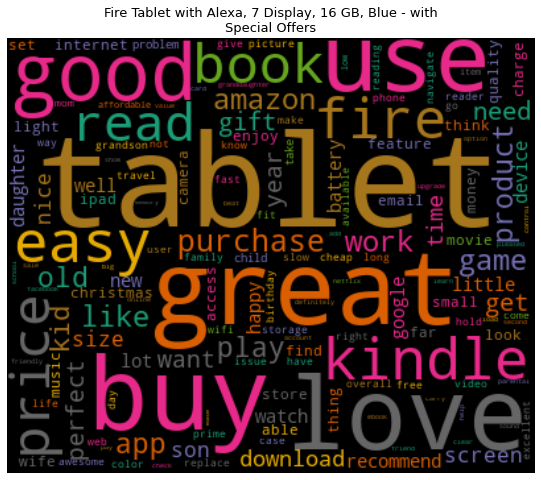

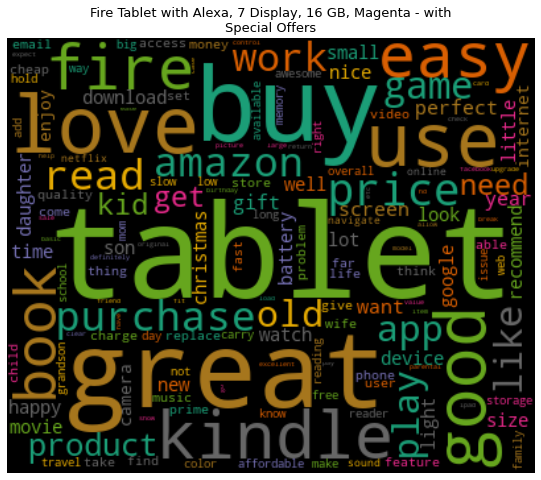

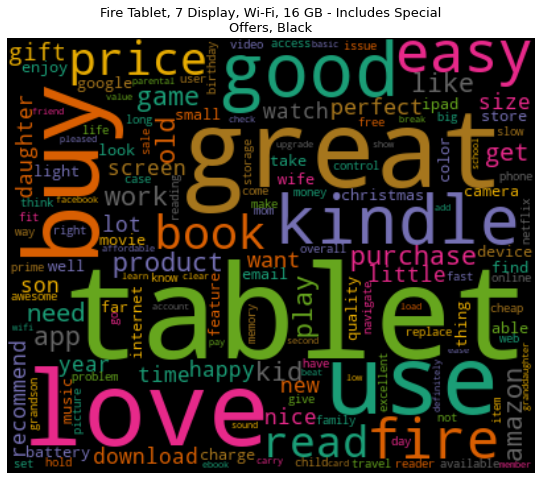

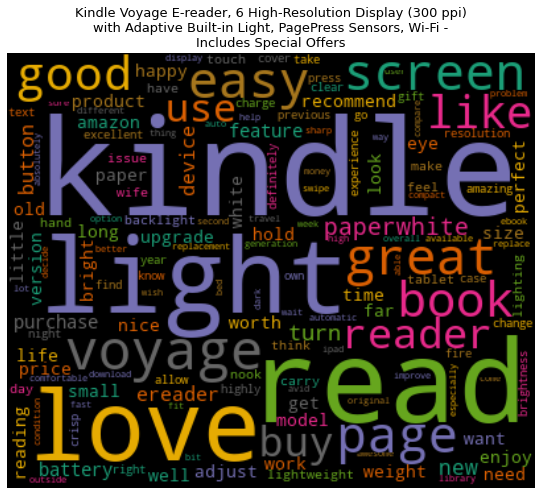

In [0]:
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

# Function for generating word clouds
def generate_wordcloud(data, title):
    wc = WordCloud(width=400, height=330, max_words=150,
                   colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title, 60)), fontsize=13)
    plt.show()


# Transposing document term matrix
df_dtm = document_term_matrix.transpose()

# Plotting word cloud for each product
for index, product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False), product)


## Check polarity

In [0]:
from textblob import TextBlob

dataframe['polarity'] = dataframe['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [0]:
# Let’s take a look at some of the most positive and negative reviews from the customers:

for index,review in enumerate(dataframe.iloc[dataframe['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

Review 1:
 This tablet is perfect for my needs which are mostly online books.
Review 2:
 It is a 16 GB mini-computer and camera perfect for trips.
Review 3:
 Perfect for kids. He has his own tablet, and I can control all access to everything. I do not have to worry about what he is getting into....


In [0]:
# negative reviews

print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(dataframe.iloc[dataframe['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Too proprietary, the apps my daughter liked I could not install on it for her so basically it was worthless for me and I returned it.
Review 2:
 the only downside of it is that you cannot have google playstore on this tablet but you can still install it manually since they both based on android os
Review 3:
 For the price, this tablet is not bad. I found a couple of things that is a bit annoying. Every time you turn on the device, ads will appear in the lock screen. Also the picture gallery, it takes several minutes to load. The wait is very annoying.


## Plot Polarity

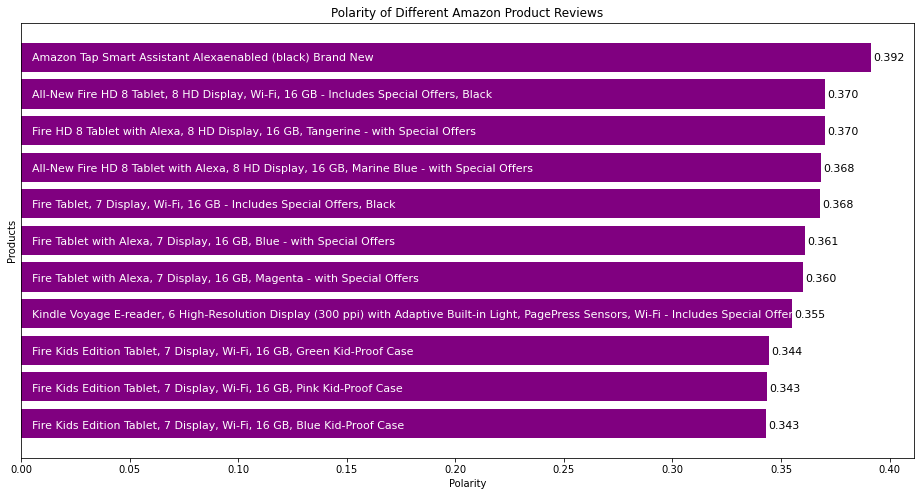

In [0]:
import numpy as np

product_polarity_sorted = pd.DataFrame(
    dataframe.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16, 8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph = plt.barh(
    np.arange(len(product_polarity_sorted.index)),
    product_polarity_sorted['polarity'],
    color='purple',
)

# Writing product names on bar
for bar, product in zip(polarity_graph, product_polarity_sorted.index):
    plt.text(0.005,
             bar.get_y() + bar.get_width(),
             '{}'.format(product),
             va='center',
             fontsize=11,
             color='white')

# Writing polarity values on graph
for bar, polarity in zip(polarity_graph, product_polarity_sorted['polarity']):
    plt.text(bar.get_width() + 0.001,
             bar.get_y() + bar.get_width(),
             '%.3f' % polarity,
             va='center',
             fontsize=11,
             color='black')

plt.yticks([])
plt.show()


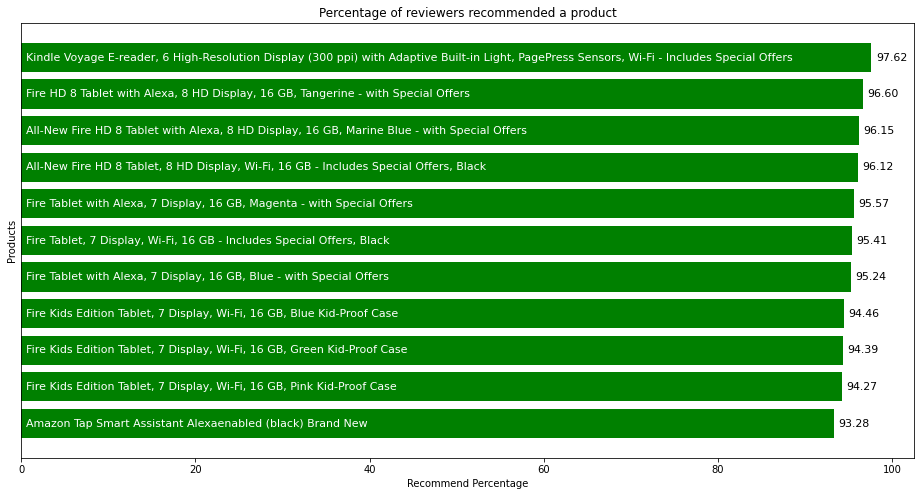

In [0]:
# most recommended products

recommend_percentage = pd.DataFrame(
    ((dataframe.groupby('name')['reviews.doRecommend'].sum() * 100) /
     dataframe.groupby('name')['reviews.doRecommend'].count()).sort_values(
         ascending=True))

plt.figure(figsize=(16, 8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph = plt.barh(np.arange(len(recommend_percentage.index)),
                           recommend_percentage['reviews.doRecommend'],
                           color='green')

# Writing product names on bar
for bar, product in zip(recommend_graph, recommend_percentage.index):
    plt.text(0.5,
             bar.get_y() + 0.4,
             '{}'.format(product),
             va='center',
             fontsize=11,
             color='white')

# Writing recommendation percentage on graph
for bar, percentage in zip(recommend_graph,
                           recommend_percentage['reviews.doRecommend']):
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + 0.4,
             '%.2f' % percentage,
             va='center',
             fontsize=11,
             color='black')

plt.yticks([])
plt.show()
